# - **Regressão: Conceitos Avançados**

In [7]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
# Carregando a base de dados 
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

In [154]:
# Visualizando as primeiras linhas 
df.head()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0


In [101]:
# Separar em X e Y 
X = df[['Metragem']] # variável independente 
y = df['Valor_Aluguel'] # variável dependente 

In [166]:
# Transformação polinomial com grau 2 
poly2 = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [173]:
# Criando e treinando o modelo 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
# Fazer prevosões com os dados de teste 
y_pred = model.predict(X_test)

In [179]:
# Avaliação
print('R² (garu 2):', r2_score(y_test, y_pred))
print('RMSE (grau 2):', np.sqrt(mean_squared_error(y_test, y_pred)))

R² (garu 2): 0.33992920142871164
RMSE (grau 2): 2673.826635888459


C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


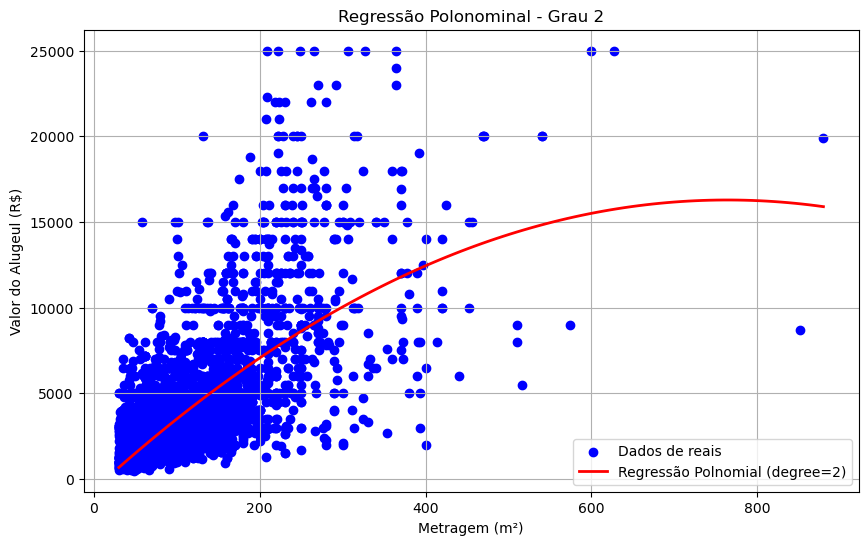

In [183]:
# Criando uma sequência devalores X (metragem) para visulizar da curva
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred = model.predict(X_range_poly)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados de reais')
plt.plot(X_range, y_range_pred, color='red', linewidth=2,label='Regressão Polnomial (degree=2)')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Alugeul (R$)')
plt.title('Regressão Polonominal - Grau 2')
plt.legend()
plt.grid(True)
plt.show()

In [191]:
# Transformação com garu 4
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)

In [199]:
# Divisão dos dados
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_poly4, y, test_size=0.2, random_state=42)

In [201]:
# Modelo grau 4 
model4 = LinearRegression()
model4.fit(X_train4, y_train4)

LinearRegression()

In [203]:
# Previsões
y_pred4 = model4.predict(X_test4)

In [207]:
# Avaliação
print('R² (grau 4):', r2_score(y_test4, y_pred4))
print('RMSE (grau 4):', np.sqrt(mean_squared_error(y_test4, y_pred4)))

R² (grau 4): 0.5584521798985386
RMSE (grau 4): 2186.8895925459665


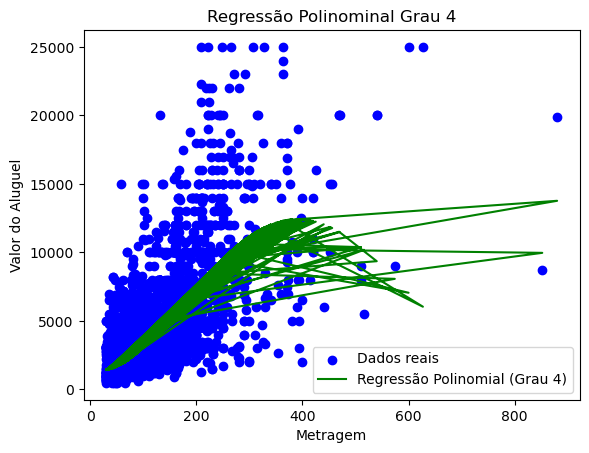

In [209]:
# Visualização
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, model4.predict(X_poly4), color='green', label='Regressão Polinomial (Grau 4)')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.legend()
plt.title('Regressão Polinominal Grau 4')
plt.show()

- Ridge Regression adiciona uma penalização L2 ao modelo de regressão, que penaliza os coeficiente grandes, ajudando a reduzir overtting. Porém, ela não zera coeficiente - todos permanecem no modelo

- Lasso Regression usa penalização L1, que alèm de reduzir overfitting, tem a capacidade de zerar coeficientes, ou seja, faz seleção de variáveis automaticamente, tornando o modelo mais simples.

- Elastic Net combina L1 e L2, unindo os benefícios do Lasso(seleção de vaiáveis) e Ridge (estabilidade do modelo). É útil quando há muitas variáveis correlacionadas ou quando queremso balancear simplicidade e desempenho.